# Finding which borough has more complaints
# Find which complaint has been registered more number of times in that borough
# Find in what month more complaints have been registered on the complaint which is been registered more number of times

In [64]:
import pandas as pd
import numpy as np
import datetime as dt
import calendar

In [99]:
dataframe = pd.read_csv('F:/Python_Project/1000linesfile.csv')
#df.to_csv(filename ,  index = False)
dataframe2 = dataframe.drop(['School Not Found','School or Citywide Complaint','Vehicle Type','Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction','Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name','Location','Latitude','Longitude'],axis=1)

dataframe2['Created Date'] = pd.to_datetime(dataframe2['Created Date'])
dataframe2['Closed Date'] = pd.to_datetime(dataframe2['Closed Date'])

dataframe2['Time'] = dataframe2['Closed Date'] - dataframe2['Created Date']
dataframe2['weekday'] = dataframe2['Created Date'].dt.dayofweek
days = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
dataframe2['day_of_week'] = dataframe2['weekday'].apply(lambda x: days[x])

#dataframe3 = dataframe2[dataframe2['Agency'].notnull()  & dataframe2['Closed Date'].notnull() & dataframe2['Closed Date'].notnull()]

# get the highest number of complaints with respect to borough
dataframe3 = dataframe2[['Agency', 'Created Date', 'Complaint Type', 'Time', 'Borough']].groupby(['Borough'])["Borough"].count().reset_index(name="count").sort_values(by='count', ascending=0)
dataframe3 = dataframe3.reset_index(drop = False)
dfborough = dataframe3

borough = dataframe3.ix[0,'Borough']
print("Borough with more complaints:  ", borough)

dataframe3 = dataframe2[['Agency', 'Created Date', 'Complaint Type', 'Time', 'Borough']]
dataframe3 = dataframe3[dataframe3['Borough'] == borough].groupby(['Complaint Type'])["Complaint Type"].count().reset_index(name="count").sort_values(by='count', ascending=0)
dataframe3 =dataframe3.reset_index(drop = False)
dfcomplaints = dataframe3
#get the type of complaint which is reported more number of times
complaint = dataframe3.ix[0,'Complaint Type']
print("More complaints are of type:  ",complaint)


# get the time required to solve the above complaint
dataframe3 = dataframe2[dataframe2['Agency'].notnull()  & dataframe2['Closed Date'].notnull() & (dataframe2['Borough'] == borough) & (dataframe2['Complaint Type'] == complaint)]
dataframe3['date'] = dataframe3['Created Date'].dt.date
dataframe3['hours'] = dataframe3['Created Date'].dt.time
dataframe3['Month'] = dataframe2['Created Date'].dt.month
dataframe3['Month'] = dataframe3['Month'].apply(lambda x: calendar.month_abbr[x])
dataframe3 = dataframe3[['Agency', 'Created Date','Month','Complaint Type', 'Time', 'Borough']]

dataframe3['time_days'] = dataframe3['Time'].apply(lambda x: x.days)



dfaveragetime = dataframe3
# get the average time required to solve the complaint
average_time = dataframe3['Time'].mean()
print('Average Time: ', average_time)

# get the number of complaints in every month
dfmonthcount = dataframe3.groupby(['Month'])['Month'].count().reset_index(name="count")

Borough with more complaints:   BROOKLYN
More complaints are of type:   Illegal Parking
Average Time:  0 days 03:57:58.612903


C:\Users\Priyanka\Anaconda3\lib\site-packages\ipykernel\__main__.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Priyanka\Anaconda3\lib\site-packages\ipykernel\__main__.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Priyanka\Anaconda3\lib\site-packages\ipykernel\__main__.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.ht

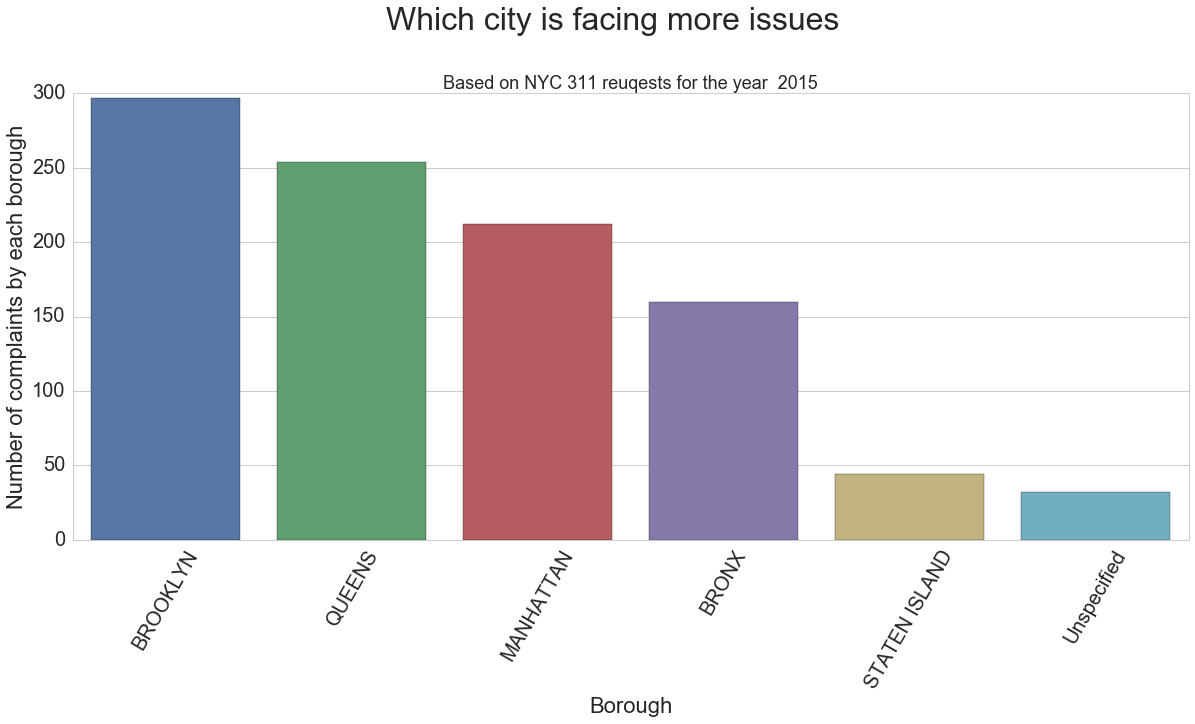

In [59]:
# Generate plot of percentage of wet commutes
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,8))
sns.set_style("whitegrid")    # Set style for seaborn output
sns.set_context("notebook", font_scale=2)
sns.barplot(x="Borough", y="count", data=dfborough)
plt.xlabel("Borough")
plt.ylabel("Number of complaints by each borough")
plt.suptitle("Which city is facing more issues", y=1.05, fontsize=32)
plt.title("Based on NYC 311 reuqests for the year  2015", fontsize=18)
plt.xticks(rotation=60)
plt.savefig("F:/Python_Project/images/city_issues.png", bbox_inches='tight')

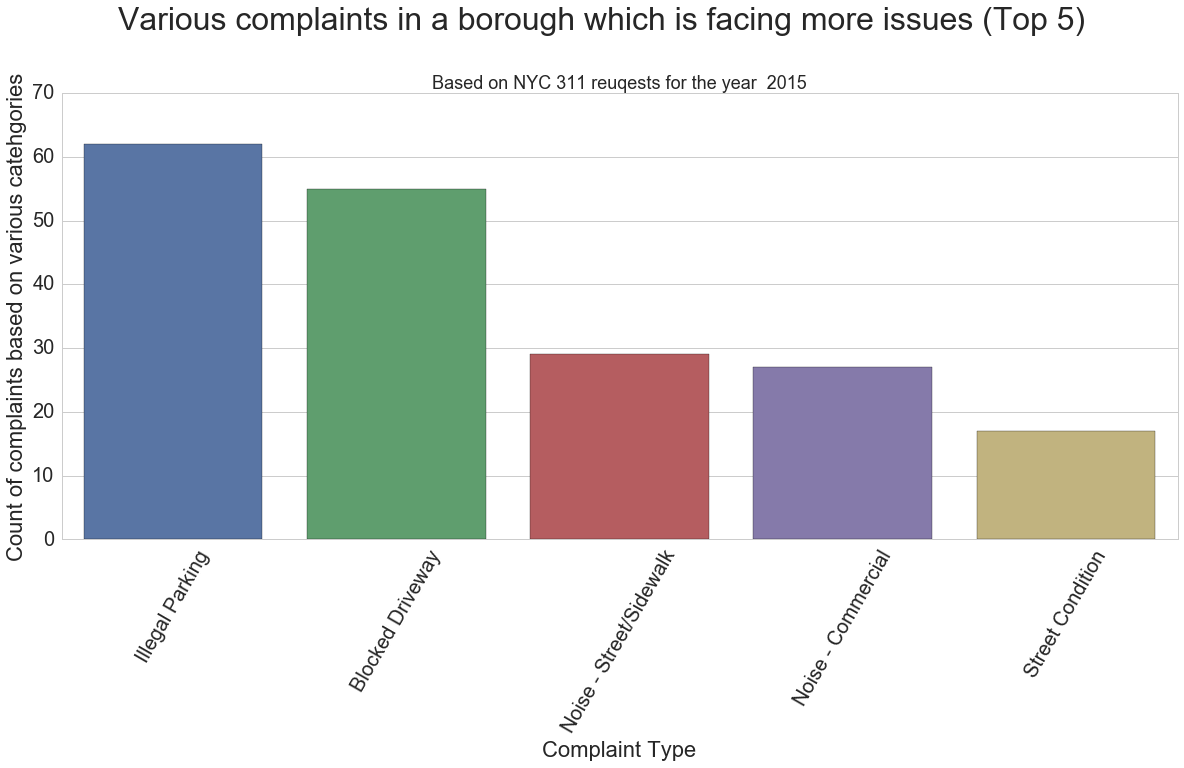

In [62]:
# Generate plot of percentage of wet commutes
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,8))
sns.set_style("whitegrid")    # Set style for seaborn output
sns.set_context("notebook", font_scale=2)
sns.barplot(x="Complaint Type", y="count", data=dfcomplaints.head().sort_values(by='count', ascending = 0))
plt.xlabel("Complaint Type")
plt.ylabel("Count of complaints based on various catehgories")
plt.suptitle("Various complaints in a borough which is facing more issues (Top 5)", y=1.05, fontsize=32)
plt.title("Based on NYC 311 reuqests for the year  2015", fontsize=18)
plt.xticks(rotation=60)
plt.savefig("F:/Python_Project/images/complaints_count.png", bbox_inches='tight')

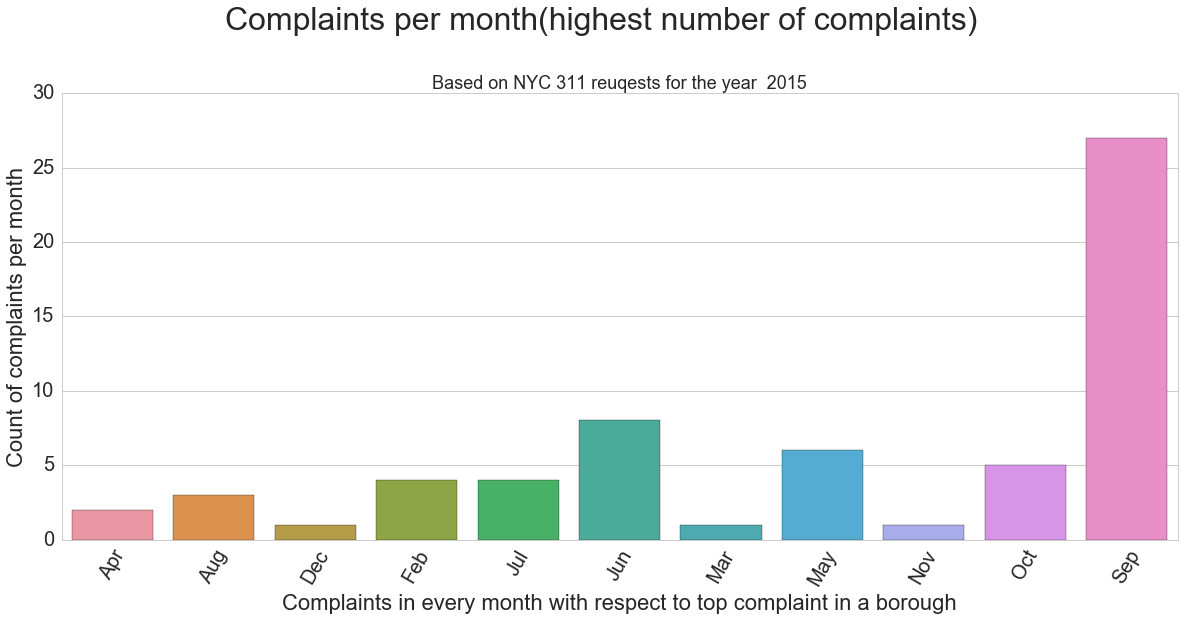

In [100]:
# Generate plot of percentage of wet commutes
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,8))
sns.set_style("whitegrid")    # Set style for seaborn output
sns.set_context("notebook", font_scale=2)
sns.barplot(x="Month", y="count", data=dfmonthcount)
plt.xlabel("Complaints in every month with respect to top complaint in a borough")
plt.ylabel("Count of complaints per month")
plt.suptitle("Complaints per month(highest number of complaints)", y=1.05, fontsize=32)
plt.title("Based on NYC 311 reuqests for the year  2015", fontsize=18)
plt.xticks(rotation=60)
plt.savefig("F:/Python_Project/images/countpermonth.png", bbox_inches='tight')